In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
import warnings
import math

import matplotlib as mpl
# it is entirely ridiculous that this is necessary, but to turn off offset
# notation in matplotlib we need this obscure line.
mpl.rcParams['axes.formatter.useoffset'] = False

In [3]:
X = np.arange(12).reshape(3, 4) + np.eye(3, 4)
X_eigs = np.linalg.eigvalsh(X @ X.T)
print(X)
X_eigs.min(), X_eigs.max()

[[ 1.  1.  2.  3.]
 [ 4.  6.  6.  7.]
 [ 8.  9. 11. 11.]]


(np.float64(0.9999999999999827), np.float64(536.383619543157))

In [4]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum()

def grad_L1(L1, L2, X):
    # tr[(L1 @ X + X @ L2.T) * (L1 @ X + X @ L2.T).T]
    # = tr[(L1 @ X @ X.T @ L1.T)] + tr[L1 @ X @ L2 @ X.T] + tr[X @ L2.T @ X.T @ L1.T] + tr[X @ L2.T @ L2 @ X.T]
    # -> 2*L1@X@X.T + X @ L2.T @ X.T + X @ L2.T @ L1.T
    # -> 2*(L1@X@X.T + X @ L2.T @ X.T)
    return 2 * (L1 @ X @ X.T + X @ L2.T @ X.T)

def grad_L2(L1, L2, X):
    return 2 * (L2 @ X.T @ X + X.T @ L1.T @ X)

def gradient_descent(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    for i in range(max_iter):
        grad_L1_val = grad_L1(L1, L2, X)
        grad_L2_val = grad_L2(L1, L2, X)
        L1 -= step_size * grad_L1_val
        L2 -= step_size * grad_L2_val

        objective_val = objective(L1, L2, X)
        delta = objective_val - prev_objective
        prev_objective = objective_val
        if abs(delta) < tol:
            break
        print(delta)
    return L1, L2

gradient_descent(X)

9867371488.0
4.538031801776611e+16
2.087053590244936e+23
9.59841816632835e+29
4.4143395131933244e+36
2.030167158803203e+43
9.336795868022226e+49
4.294018682309276e+56
1.9748312702403393e+63
9.082304560029808e+69
4.1769774139285994e+76
1.9210036616975543e+83
8.834749874274735e+89
4.0631263176262607e+96
1.8686432222669343e+103
8.59394274053515e+109
3.952378439475406e+116
1.8177099615929364e+123
8.359699242041053e+129
3.8446491956361915e+136
1.7681649793296979e+143
8.1318404750076345e+149
3.7398563077547605e+156
1.7199704354308473e+163
7.91019241199726e+169
3.6379197401230405e+176
1.6730895212491171e+183
7.694585769005792e+189
3.5387616385513643e+196
1.6274864314236895e+203
7.484855876171695e+209
3.4423062709072285e+216
1.5831263365338067e+223
7.280842552009219e+229
3.348479969274776e+236
1.5399753564977533e+243
7.082389981069571e+249
3.2572110736908294e+256
1.4980005346968967e+263
6.889346594936658e+269
3.1684298774144916e+276
1.4571698128050288e+283
6.701564956466506e+289
3.082068573688

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3152674273.py:2: RuntimeWarning: overflow encountered in square
  return ((L1 @ X + X @ L2.T)**2).sum()
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3152674273.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  delta = objective_val - prev_objective
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3152674273.py:9: RuntimeWarning: overflow encountered in matmul
  return 2 * (L1 @ X @ X.T + X @ L2.T @ X.T)
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3152674273.py:9: RuntimeWarning: overflow encountered in add
  return 2 * (L1 @ X @ X.T + X @ L2.T @ X.T)
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3152674273.py:12: RuntimeWarning: overflow encountered in matmul
  return 2 * (L2 @ X.T @ X + X.T @ L1.T @ X)
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3152674273.py:2: RuntimeWarning: overflow encountered in matm

(array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]),
 array([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]]))

In [41]:
def objective(L, X):
    return ((L @ X)**2).sum()

def grad_L(L, X):
    return 2 * (L @ X @ X.T)


def gradient_descent(X, L_init=None, step_size=1, max_iter=100, tol=1e-6):
    if L_init is None:
        L_init = np.eye(X.shape[0])
    L = L_init.copy()
    prev_objective = objective(L, X)
    for i in range(max_iter):
        grad_L_val = grad_L(L, X)
        L -= step_size * grad_L_val

        objective_val = objective(L, X)
        delta = objective_val - prev_objective
        prev_objective = objective_val
        if abs(delta) < tol:
            break
        print(delta, objective_val)
    return L

gradient_descent(X, step_size=1/X_eigs.max())

-0.026868442959198546 538.9731315570408
-0.026579596431815844 538.946551960609
-0.026293967713513666 538.9202579928955
-0.02601152002046092 538.894246472875
-0.02573221699685746 538.8685142558782
-0.025456022709022363 538.8430582331691
-0.025182901643006517 538.8178753315261
-0.02491281869663453 538.7929625128295
-0.024645739175639392 538.7683167736539
-0.024381628790479226 538.7439351448634
-0.024120453649402407 538.719814691214
-0.0238621802545822 538.6959525109594
-0.023606775498365096 538.672345735461
-0.023354206656108545 538.6489915288049
-0.02310444138583989 538.6258870874191
-0.022857447718934054 538.6030296397001
-0.022613194059772468 538.5804164456404
-0.022371649179035558 538.5580447964613
-0.0221327822097237 538.5359120142516
-0.021896562644315054 538.5140154516073
-0.02166296032817172 538.4923524912791
-0.02143194545794813 538.4709205458212
-0.021203488574769835 538.4497170572464
-0.02097756056309663 538.4287394966833
-0.020754132643673984 538.4079853640396
-0.020533176372

array([[ 0.58143461, -0.01100902,  0.08482404],
       [-0.01100902,  0.75616304,  0.14678171],
       [ 0.08482404,  0.14678171,  0.89701607]])

Iteration 0: delta = -160.2524441720243, objective = 378.7475558279757
Iteration 10: delta = -12.99146752686741, objective = 87.99323833611948
Iteration 20: delta = -3.2579426042422455, objective = 22.40375142544532
Iteration 30: delta = -0.8221157058855315, objective = 5.915508951440108
Iteration 40: delta = -0.2101284928688525, objective = 1.734980817847533
Iteration 50: delta = -0.05548864833954725, objective = 0.6538583350462324
Iteration 60: delta = -0.01604194624277805, objective = 0.35881019703136385
Iteration 70: delta = -0.005782527197571274, objective = 0.2657368948021054
Iteration 80: delta = -0.0029819545040001005, objective = 0.22612686579071098
Iteration 90: delta = -0.0023355175242661397, objective = 0.2028516673924253
Iteration 100: delta = -0.0022333769147091787, objective = 0.1847609437166277
Iteration 110: delta = -0.0018331806481339807, objective = 0.16676582951553956
Iteration 120: delta = -0.0017763646298507851, objective = 0.15218970003407883
Iteration 130: delta

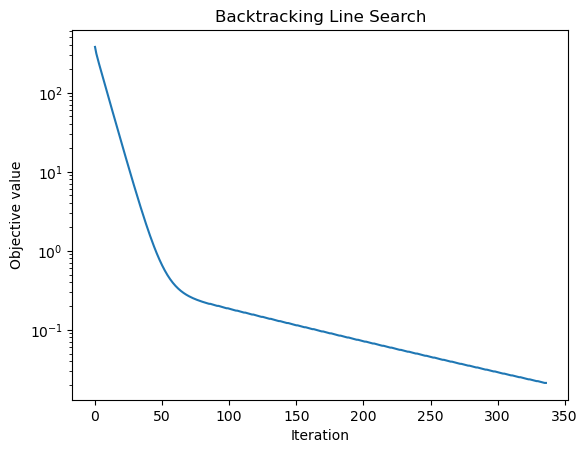

In [59]:
def objective(L, X):
    return ((L @ X)**2).sum()

def grad_L(L, X):
    return np.tril(2 * (L @ X @ X.T))


def backtracking_line_search(X, L_init=None, step_size=1, max_iter=1000, tol=1e-6, beta=0.8, max_backtrack=50):
    if L_init is None:
        L_init = np.eye(X.shape[0])
    L = L_init.copy()
    prev_objective = objective(L, X)
    iters = []
    for i in range(max_iter):
        iter_step_size = step_size
        grad_L_val = grad_L(L, X)

        for j in range(max_backtrack):
            L -= iter_step_size * grad_L_val

            objective_val = objective(L, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L += iter_step_size * grad_L_val
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            break
        iters.append(objective_val)
        prev_objective = objective_val

        if abs(delta) < tol:
            break
        if i % 10 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    print("Final objective value:", objective_val)
    return L, iters

L, iters = backtracking_line_search(X, step_size=0.1)
print(L)

fig, ax = plt.subplots()
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective value')
ax.set_title('Backtracking Line Search')
ax.set_yscale('log')
ax.plot(np.arange(len(iters)), iters)

Iteration 0: delta = -1008.9474079999995, objective = 1147.0525920000005
Iteration 10: delta = -3.535151991813418, objective = 16.939199255873234
Iteration 20: delta = -0.47711652904919877, objective = 6.928017991925621
Iteration 30: delta = -0.2255507373982386, objective = 3.7180198450977393
Iteration 40: delta = -0.10991029187540136, objective = 2.168100837063809
Iteration 50: delta = -0.054405330887390635, objective = 1.4075274601451273
Iteration 60: delta = -0.027702901732330476, objective = 1.0262847371198527
Iteration 70: delta = -0.014815659761507671, objective = 0.8277861609660011
Iteration 80: delta = -0.008557481923271437, objective = 0.7177218013006784
Iteration 90: delta = -0.00548242357021278, objective = 0.6508242527237946
Iteration 100: delta = -0.0039379106094878935, objective = 0.6053442854306161
Iteration 110: delta = -0.0031312815304950226, objective = 0.5708121355548355
Iteration 120: delta = -0.0026822085832048925, objective = 0.542169041710734
Iteration 130: delta

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_61923/3596871983.py:52: UserWarning: Maximum number of iterations reached.
  warnings.warn("Maximum number of iterations reached.")


0.03926020657347601


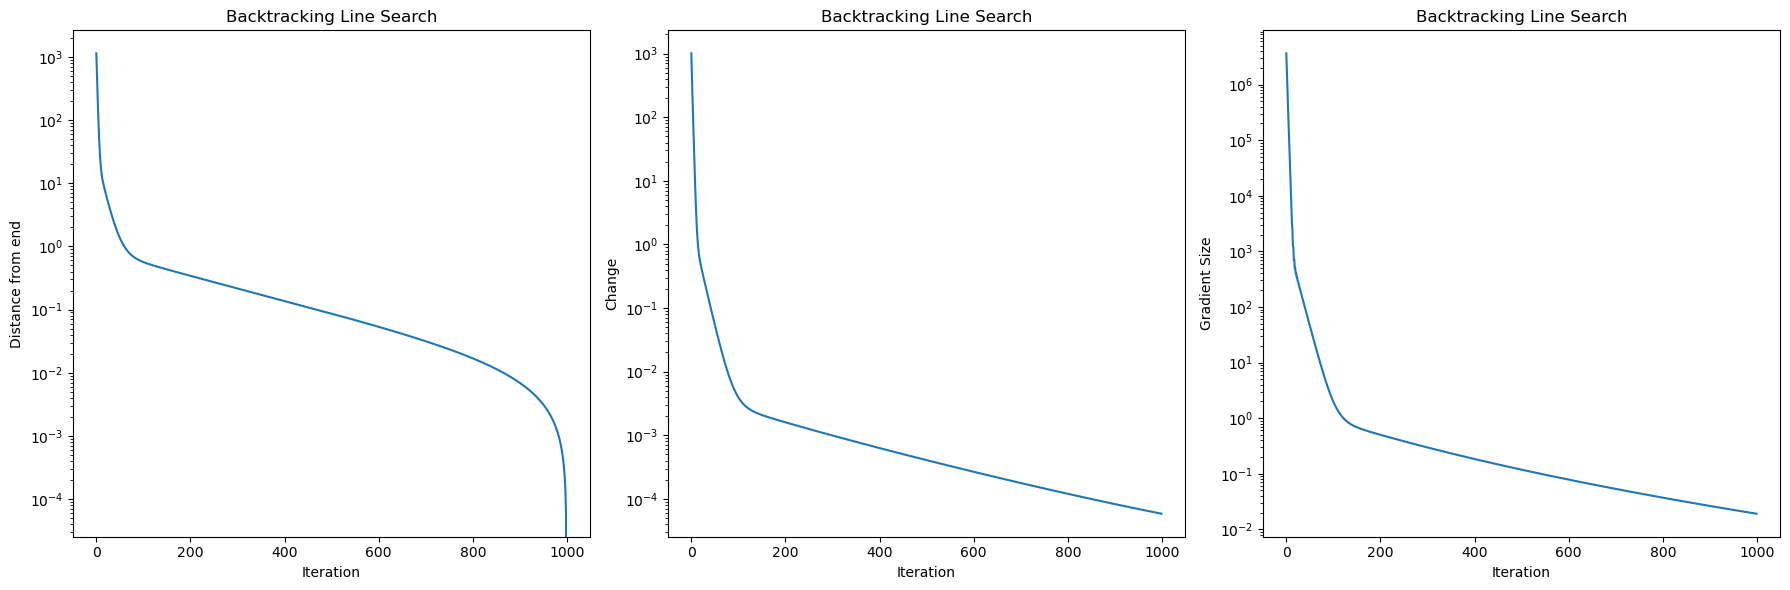

In [134]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum()

def grad_L1(L1, L2, X):
    return np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T))

def grad_L2(L1, L2, X):
    return np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X))

def backtracking_line_search(X, L1_init=None, L2_init=None, step_size=1, max_iter=1000, tol=1e-6, beta=0.8, max_backtrack=50):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    for i in range(max_iter):
        grad_L1_val = grad_L1(L1, L2, X)
        grad_L2_val = grad_L2(L1, L2, X)
        iter_step_size = step_size

        for j in range(max_backtrack):
            L1 -= iter_step_size * grad_L1_val
            L2 -= iter_step_size * grad_L2_val

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L1 += iter_step_size * grad_L1_val
                L2 += iter_step_size * grad_L2_val
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad_L1_val**2).sum())
        prev_objective = objective_val

        if abs(delta) < tol:
            break
        if i % 10 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, iters, eps, grads

L1, L2, iters, eps, grads = backtracking_line_search(X, step_size=0.001)
print(L1)
print(L2)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Distance from end')
ax1.set_title('Backtracking Line Search')
ax1.set_yscale('log')
ax1.plot(np.arange(len(iters)), iters - iters[-1])
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.tight_layout()
print(iters[-1])

Iteration 0: delta = -3.3502308653214117, objective = 0.6514108023673567
Iteration 1000: delta = -2.5881572872253275e-06, objective = 0.006528385843420807
Iteration 2000: delta = -9.01490856439896e-07, objective = 0.004422959920327728
0.0039484881731283745


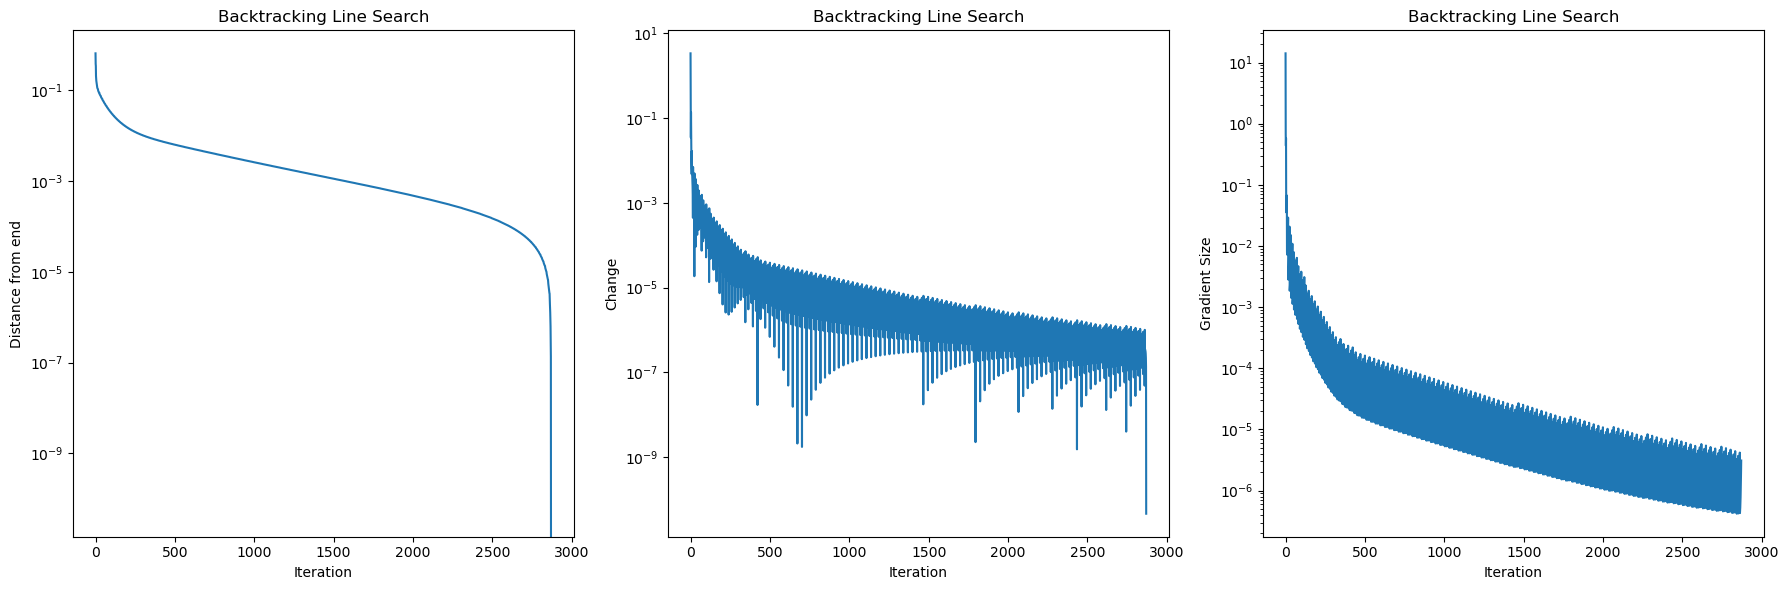

In [ ]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum()

def grad_L1(L1, L2, X):
    return np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T))

def grad_L2(L1, L2, X):
    return np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X))

def backtracking_line_search(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    for i in range(max_iter):
        grad_L1_val = grad_L1(L1, L2, X)
        grad_L2_val = grad_L2(L1, L2, X)
        iter_step_size = step_size

        for j in range(max_backtrack):
            L1 -= iter_step_size * grad_L1_val
            L2 -= iter_step_size * grad_L2_val

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L1 += iter_step_size * grad_L1_val
                L2 += iter_step_size * grad_L2_val
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad_L1_val**2).sum()+(grad_L2_val**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol:
            break
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads)

Y = np.arange(144).reshape(12, 12) + np.eye(12)
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads = backtracking_line_search(Y, step_size=1, tol=1e-10, beta=0.5, max_iter=100000)
#print(L1)
#print(L2)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Distance from end')
ax1.set_title('Backtracking Line Search')
ax1.set_yscale('log')
ax1.plot(np.arange(len(iters)), iters - iters[-1])
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.tight_layout()
print(iters[-1])

Iteration 0: delta = -3.050167346472817, objective = 1.017568377901672
Iteration 1000: delta = -1.8260741557751814e-08, objective = 0.190721778639846
Iteration 2000: delta = -9.472215595218714e-09, objective = 0.19070839386359667
Iteration 3000: delta = -4.913429690889259e-09, objective = 0.1907014509096802
Iteration 4000: delta = -2.5486952548448016e-09, objective = 0.19069784945916185
Iteration 5000: delta = -1.3220598504837255e-09, objective = 0.19069598131397225
Iteration 6000: delta = -6.857791834402605e-10, objective = 0.19069501226927538
Iteration 7000: delta = -3.5572755852086857e-10, objective = 0.1906945096061672
Iteration 8000: delta = -1.8452317451789213e-10, objective = 0.1906942488646175
0.1906941200666309


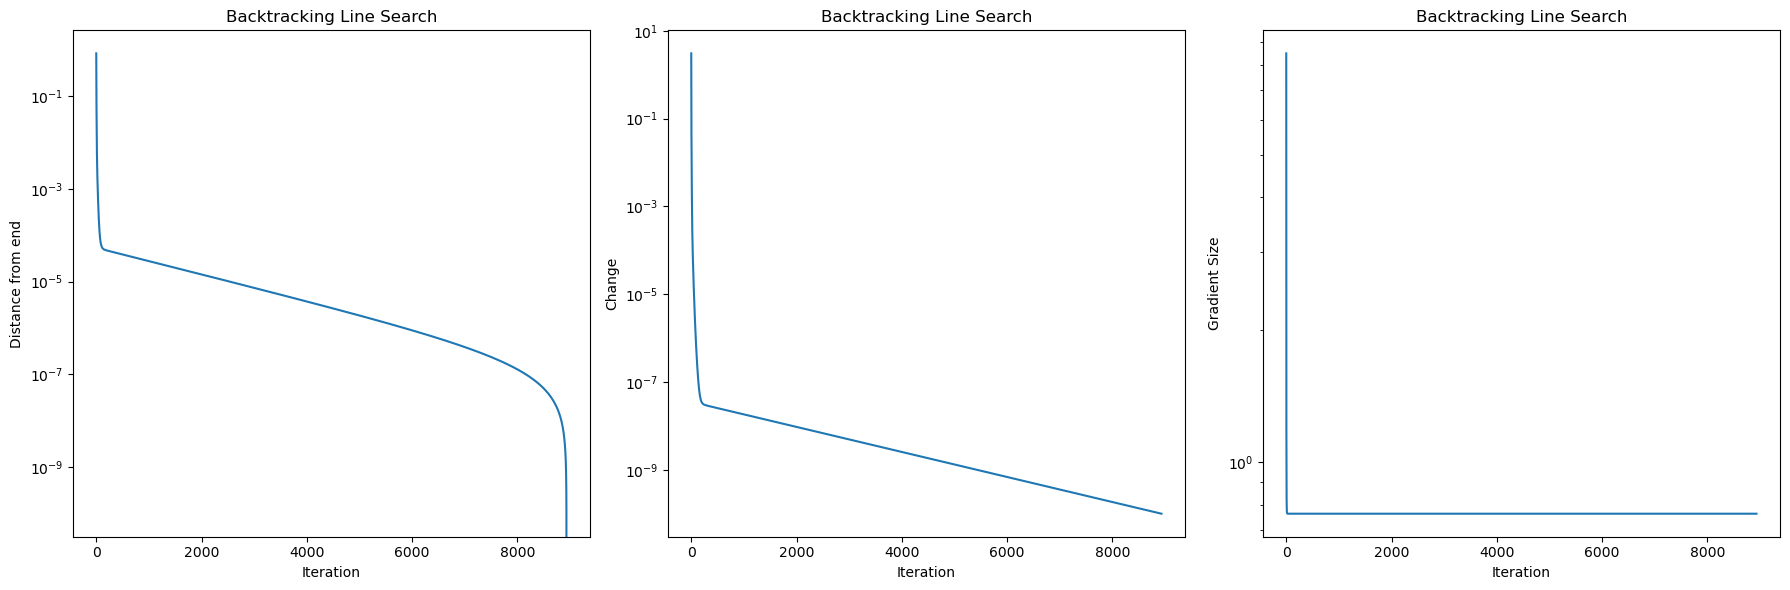

In [170]:
def objective(L1, X):
    return ((L1 @ X)**2).sum()

def grad_L(L1, X):
    return np.tril(2 * (L1 @ X @ X.T))

def backtracking_line_search(X, L_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100):
    if L_init is None:
        L_init = np.eye(X.shape[0])
    L = L_init.copy()
    prev_objective = objective(L, X)
    iters = []
    eps = []
    grads = []
    for i in range(max_iter):
        grad_L_val = grad_L(L, X)
        iter_step_size = step_size

        for j in range(max_backtrack):
            L -= iter_step_size * grad_L_val

            objective_val = objective(L, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L += iter_step_size * grad_L_val
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad_L_val**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol:
            break
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L, np.array(iters), np.array(eps), np.array(grads)

#Y = np.arange(144).reshape(12, 12) + np.eye(12)
#Y /= np.linalg.norm(Y, ord=2)
Y = np.random.normal(size=(12, 12))
Y /= np.linalg.norm(Y, ord=2)
L, iters, eps, grads = backtracking_line_search(Y, step_size=1, tol=1e-10, beta=0.5, max_iter=100000)
#print(L1)
#print(L2)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Distance from end')
ax1.set_title('Backtracking Line Search')
ax1.set_yscale('log')
ax1.plot(np.arange(len(iters)), iters - iters[-1])
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.tight_layout()
print(iters[-1])

Iteration 0: delta = -10.873230677301564, objective = 3.5246775392631693
Iteration 1000: delta = -2.994688386159794e-09, objective = 0.08568332116666
Iteration 2000: delta = -1.0313971898767704e-12, objective = 0.08568294721402617
0.0856829470854131


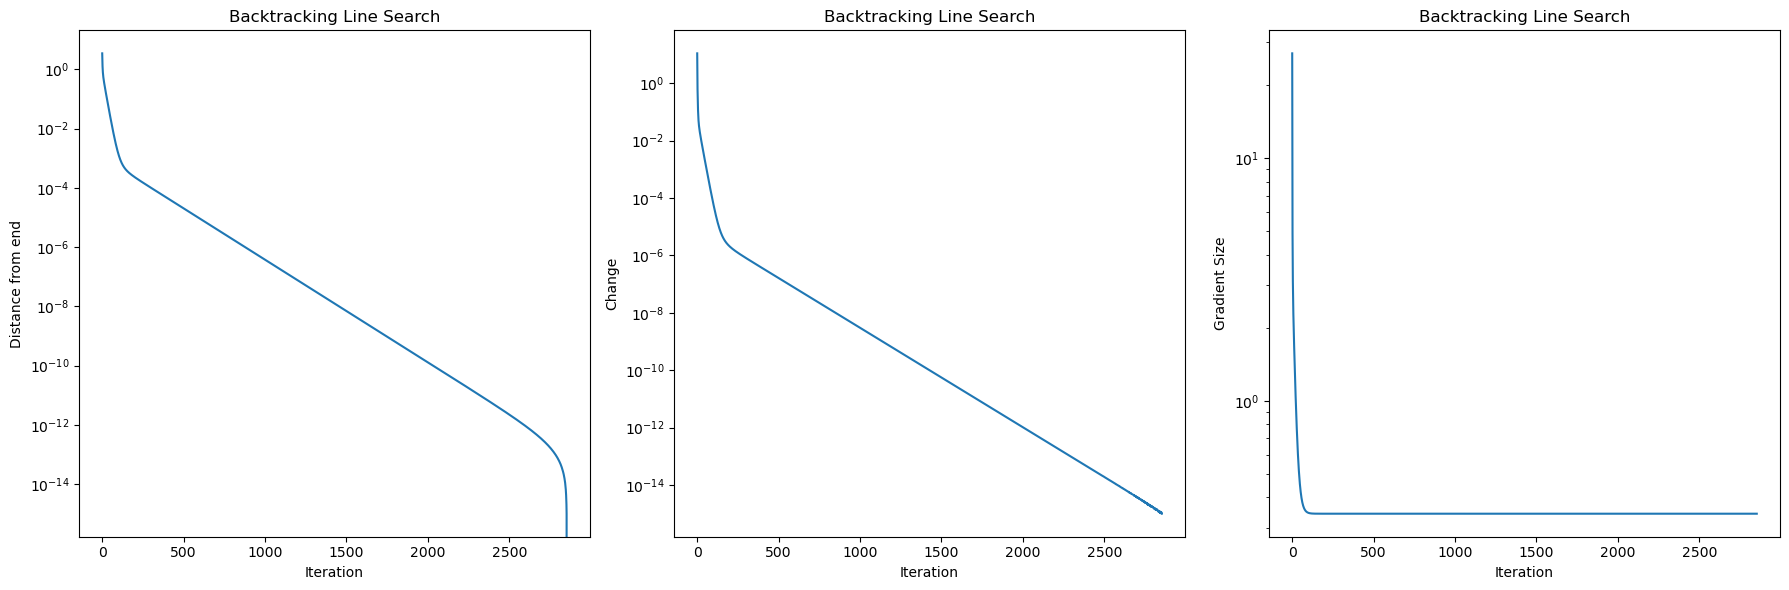

In [160]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum()

def grad_L1(L1, L2, X):
    return np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)

def grad_L2(L1, L2, X):
    return 0 * np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)

def project_grad(gL1, gL2):
    tr_gL1 = np.trace(gL1)
    tr_gL2 = np.trace(gL2)
    gL1 = gL1 - (tr_gL1 / gL1.shape[0]) * np.eye(gL1.shape[0])
    gL2 = gL2 - (tr_gL2 / gL2.shape[0]) * np.eye(gL2.shape[0])
    to_add = (tr_gL1 + tr_gL2) / (2 * gL1.shape[0] * gL2.shape[0])
    gL1 += to_add * np.eye(gL1.shape[0])
    gL2 += to_add * np.eye(gL2.shape[0])
    return gL1, gL2

def backtracking_line_search(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    for i in range(max_iter):
        grad_L1_val = grad_L1(L1, L2, X)
        grad_L2_val = grad_L2(L1, L2, X)
        #grad_L1_val, grad_L2_val = project_grad(grad_L1_val, grad_L2_val)
        iter_step_size = step_size

        for j in range(max_backtrack):
            L1 -= iter_step_size * grad_L1_val
            L2 -= iter_step_size * grad_L2_val

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L1 += iter_step_size * grad_L1_val
                L2 += iter_step_size * grad_L2_val
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad_L1_val**2).sum()+(grad_L2_val**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol:
            break
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads)

#Y = np.arange(144).reshape(12, 12) + np.eye(12)
#Y /= np.linalg.norm(Y, ord=2)
Y = np.random.normal(size=(12, 12))
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads = backtracking_line_search(Y, step_size=1, tol=1e-15, beta=0.5, max_iter=100000)
#print(L1)
#print(L2)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Distance from end')
ax1.set_title('Backtracking Line Search')
ax1.set_yscale('log')
ax1.plot(np.arange(len(iters)), iters - iters[-1])
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.tight_layout()
print(iters[-1])

Iteration 0: delta = -10.588449139561217, objective = 3.578420689605503
Iteration 1000: delta = -2.0536634386114638e-08, objective = 0.04790180496365985
Iteration 2000: delta = -5.872071093260267e-09, objective = 0.04789185475764814
Iteration 3000: delta = -3.165516439251892e-09, objective = 0.0478875564165689
Iteration 4000: delta = -1.987833515848525e-09, objective = 0.04788504516178984
Iteration 5000: delta = -1.3219948746812094e-09, objective = 0.04788341736068391
Iteration 6000: delta = -8.957724284552881e-10, objective = 0.04788232336449312
Iteration 7000: delta = -6.10493267050316e-10, objective = 0.047881579651113546
Iteration 8000: delta = -4.1680313367375987e-10, objective = 0.04788107228317773
Iteration 9000: delta = -2.847172220210581e-10, objective = 0.047880725781843755
Iteration 10000: delta = -1.945211630660637e-10, objective = 0.04788048906586041
Iteration 11000: delta = -1.3290504113916413e-10, objective = 0.047880327335013115
Iteration 12000: delta = -9.0807625308109

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/2988854821.py:45: UserWarning: Backtracking line search failed to find a suitable step size.
  warnings.warn("Backtracking line search failed to find a suitable step size.")


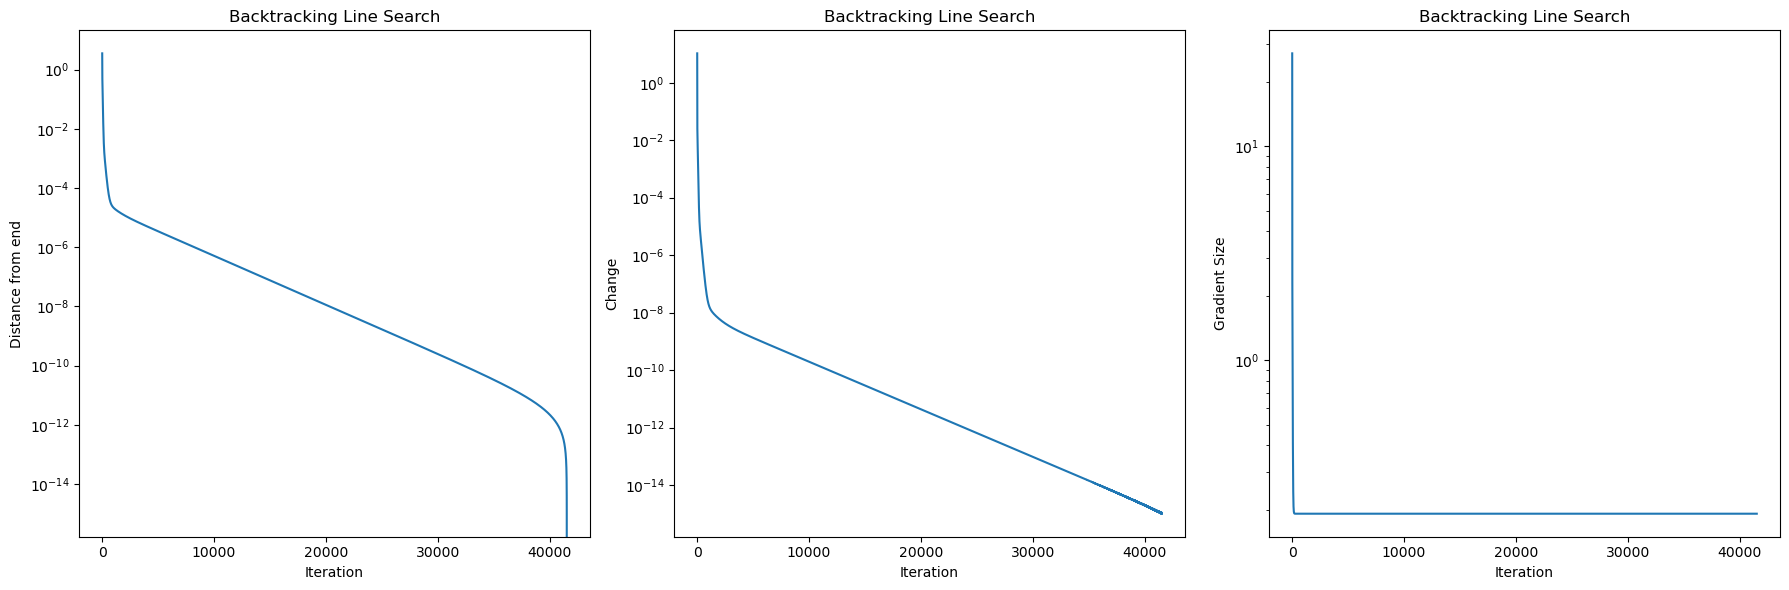

In [22]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum()

def grad_L1(L1, L2, X):
    return np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)

def grad_L2(L1, L2, X):
    return 0 * np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)

def flip_flop(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    axis = 0
    last_within_tol = -100
    for i in range(max_iter):
        grad = grad_L1(L1, L2, X) if axis == 0 else grad_L2(L1, L2, X)
        iter_step_size = step_size

        for j in range(max_backtrack):
            if axis == 0:
                L1 -= iter_step_size * grad
            else:
                L2 -= iter_step_size * grad

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                if axis == 0:
                    L1 += iter_step_size * grad
                else:
                    L2 += iter_step_size * grad
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol:
            axis = (axis + 1) % 2
            if last_within_tol == i - 1:
                # Converged!
                break
            else:
                last_within_tol = i
                print("Within tol, switching axis")
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads)

#Y = np.arange(144).reshape(12, 12) + np.eye(12)
#Y /= np.linalg.norm(Y, ord=2)
Y = np.random.normal(size=(12, 12))
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads = flip_flop(Y, step_size=1, tol=1e-15, beta=0.5, max_iter=100000)
print(L1)
print(L2)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Distance from end')
ax1.set_title('Backtracking Line Search')
ax1.set_yscale('log')
ax1.plot(np.arange(len(iters)), iters - iters[-1])
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.tight_layout()
print(iters[-1])

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/1729187679.py:2: RuntimeWarning: invalid value encountered in log
  return ((L1 @ X + X @ L2.T)**2).sum() - 0*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/1729187679.py:2: RuntimeWarning: divide by zero encountered in log
  return ((L1 @ X + X @ L2.T)**2).sum() - 0*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/1729187679.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return ((L1 @ X + X @ L2.T)**2).sum() - 0*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/1729187679.py:74: UserWarning: Backtracking line search failed to find a suitable step size.
  warnings.warn("Backtracking line search failed to find a suitable step size.")
/var/folders/

Iteration 0: delta = -4.621529133149119, objective = 1.4997729636078456
Within tol, switching axis
4.964471141773197e-08


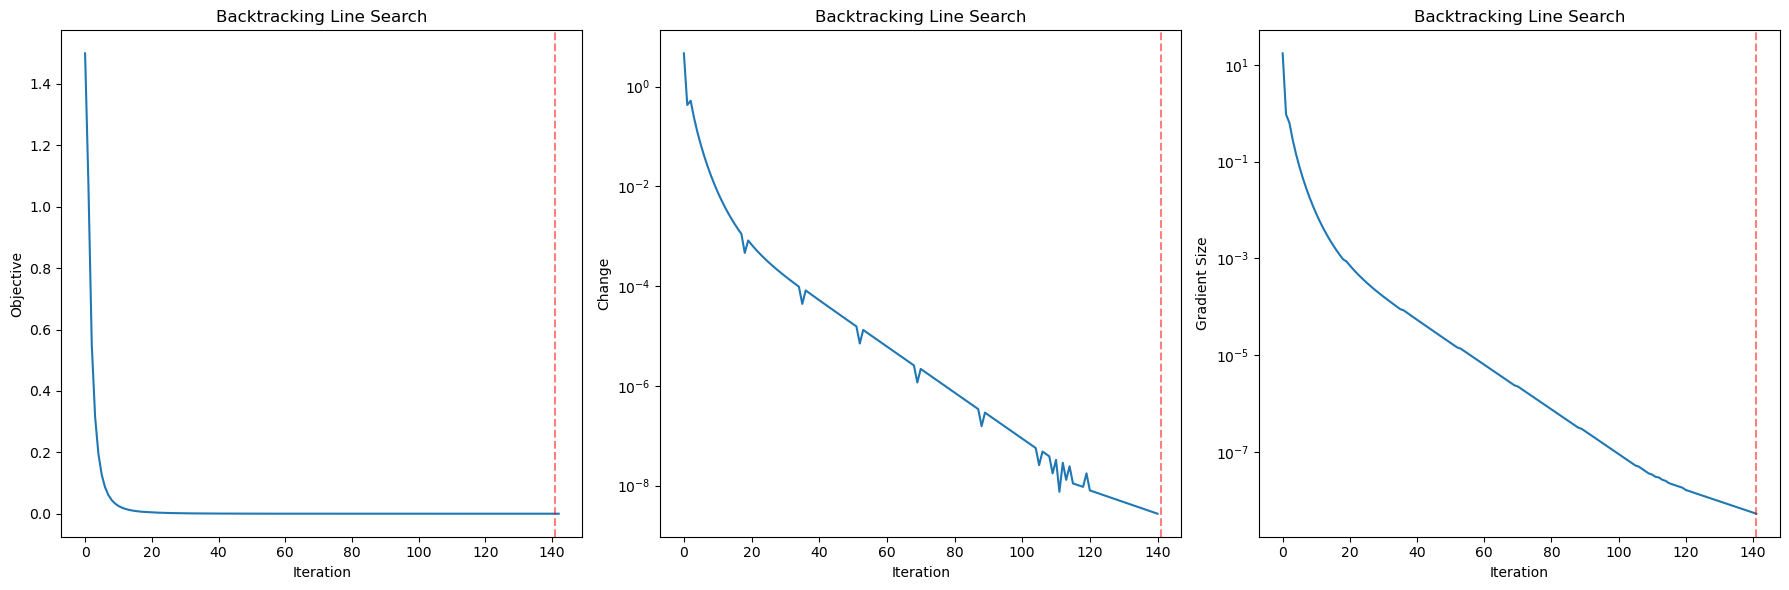

In [180]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum() - 0*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()

def grad_L1(L1, L2, X):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (0  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term + np.diag(log_term)

def grad_L2(L1, L2, X):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (0 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term + np.diag(log_term)


def flip_flop(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100, min_diag=1e-6):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    changes = []
    axis = 0
    last_within_tol = -100
    for i in range(max_iter):
        grad = grad_L1(L1, L2, X) if axis == 0 else grad_L2(L1, L2, X)
        iter_step_size = step_size

        line_search_succeeded = True
        for j in range(max_backtrack):
            if axis == 0:
                L1 -= iter_step_size * grad
            else:
                L2 -= iter_step_size * grad

            # badness = min(np.diag(L1).min(), np.diag(L2).min())
            # bad = badness < min_diag
            # if bad:
            #     print(f"Badness: {badness}")
            #     if axis == 0:
            #         #L1 += iter_step_size * grad
            #         l2min = np.diag(L2).min()
            #         # All diagonals must be larger than -l2min + min_diag
            #         DL1 = np.diag(L1).copy()
            #         DL1[DL1 < -l2min + min_diag] = -l2min + min_diag
            #         np.fill_diagonal(L1, 0)
            #         L1 += np.diag(DL1)
            #     else:
            #         #L2 += iter_step_size * grad
            #         l1min = np.diag(L1).min()
            #         # All diagonals must be larger than -l2min + min_diag
            #         DL2 = np.diag(L2).copy()
            #         DL2[DL2 < -l1min + min_diag] = -l1min + min_diag
            #         np.fill_diagonal(L2, 0)
            #         L2 += np.diag(DL2)
                

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                if axis == 0:
                    L1 += iter_step_size * grad
                else:
                    L2 += iter_step_size * grad
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            objective_val = prev_objective
            line_search_succeeded = False
            #break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol or not line_search_succeeded:
            axis = (axis + 1) % 2
            if last_within_tol == i - 1:
                # Converged!
                break
            else:
                last_within_tol = i
                changes.append(i)
                print("Within tol, switching axis")
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads), changes

#Y = np.arange(144).reshape(12, 12) + np.eye(12)
#Y /= np.linalg.norm(Y, ord=2)
Y = np.random.normal(size=(5, 5))
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads, changes = flip_flop(Y, step_size=1, tol=1e-15, beta=0.5, max_iter=10000, max_backtrack=50)
#print(L1)
#print(L2)
#print(iters)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.set_title('Backtracking Line Search')
ax1.plot(iters)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])

for ax in (ax1, ax2, ax3):
    for change in changes:
        ax.axvline(change, color='red', linestyle='--', alpha=0.5)

fig.tight_layout()
print(iters[-1])

Iteration 0: delta = -1028.5134789955391, objective = -1864.000886576719


/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3302738116.py:96: UserWarning: Maximum number of iterations reached.
  warnings.warn("Maximum number of iterations reached.")


[]


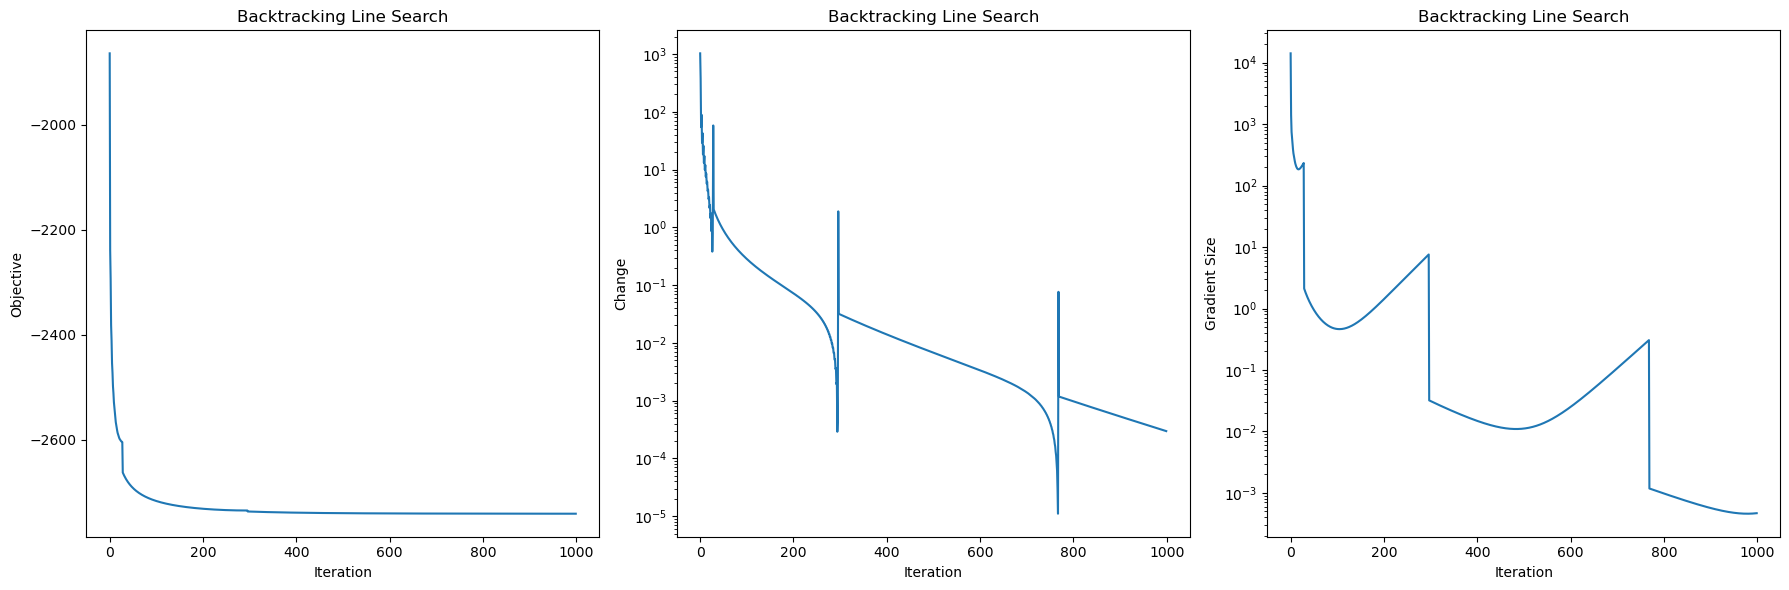

In [231]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum() - 2*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()

def grad_L1(L1, L2, X):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (2  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term + np.diag(log_term)

def grad_L2(L1, L2, X):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (2 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term + np.diag(log_term)


def flip_flop(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100, min_diag=1e-6):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    changes = []
    axis = 0
    last_within_tol = -100
    for i in range(max_iter):
        grad = grad_L1(L1, L2, X) if axis == 0 else grad_L2(L1, L2, X)
        iter_step_size = step_size

        line_search_succeeded = True
        for j in range(max_backtrack):
            if axis == 0:
                L1 -= iter_step_size * grad
            else:
                L2 -= iter_step_size * grad

            # badness = min(np.diag(L1).min(), np.diag(L2).min())
            # bad = badness < min_diag
            # if bad:
            #     print(f"Badness: {badness}")
            #     if axis == 0:
            #         #L1 += iter_step_size * grad
            #         l2min = np.diag(L2).min()
            #         # All diagonals must be larger than -l2min + min_diag
            #         DL1 = np.diag(L1).copy()
            #         DL1[DL1 < -l2min + min_diag] = -l2min + min_diag
            #         np.fill_diagonal(L1, 0)
            #         L1 += np.diag(DL1)
            #     else:
            #         #L2 += iter_step_size * grad
            #         l1min = np.diag(L1).min()
            #         # All diagonals must be larger than -l2min + min_diag
            #         DL2 = np.diag(L2).copy()
            #         DL2[DL2 < -l1min + min_diag] = -l1min + min_diag
            #         np.fill_diagonal(L2, 0)
            #         L2 += np.diag(DL2)
                

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                if axis == 0:
                    L1 += iter_step_size * grad
                else:
                    L2 += iter_step_size * grad
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            objective_val = prev_objective
            line_search_succeeded = False
            #break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((grad**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol or not line_search_succeeded:
            axis = (axis + 1) % 2
            if last_within_tol == i - 1:
                # Converged!
                break
            else:
                last_within_tol = i
                changes.append(i)
                print("Within tol, switching axis")
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads), changes

#Y = np.arange(144).reshape(12, 12) + np.eye(12)
#Y /= np.linalg.norm(Y, ord=2)
Y = np.random.normal(size=(25, 25))
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads, changes = flip_flop(Y, step_size=1, tol=1e-15, beta=0.5, max_iter=1000, max_backtrack=50)
#print(L1)
#print(L2)
#print(iters)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.set_title('Backtracking Line Search')
ax1.plot(iters)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])

for ax in (ax1, ax2, ax3):
    for change in changes:
        ax.axvline(change, color='red', linestyle='--', alpha=0.5)

fig.tight_layout()
print(changes)

Iteration 0: delta = -5138.127256808688, objective = -5127.502956291276
Iteration 1000: delta = -0.07607855091919191, objective = -8043.905469110985
Iteration 2000: delta = -0.034151405012380565, objective = -8096.546064549793
Iteration 3000: delta = -0.016670087835336744, objective = -8120.494218599179
Iteration 4000: delta = -0.01038781362149166, objective = -8133.519658302819
Iteration 5000: delta = -0.007716429289757798, objective = -8142.41398960431
Iteration 6000: delta = -0.0062484632626365055, objective = -8149.335890428689
Iteration 7000: delta = -0.005293600791446806, objective = -8155.076688298411
Iteration 8000: delta = -0.0046156616908774595, objective = -8160.013364400068
Iteration 9000: delta = -0.004109071542188758, objective = -8164.364056140728


/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/2976522907.py:63: UserWarning: Maximum number of iterations reached.
  warnings.warn("Maximum number of iterations reached.")


-8168.265078778011


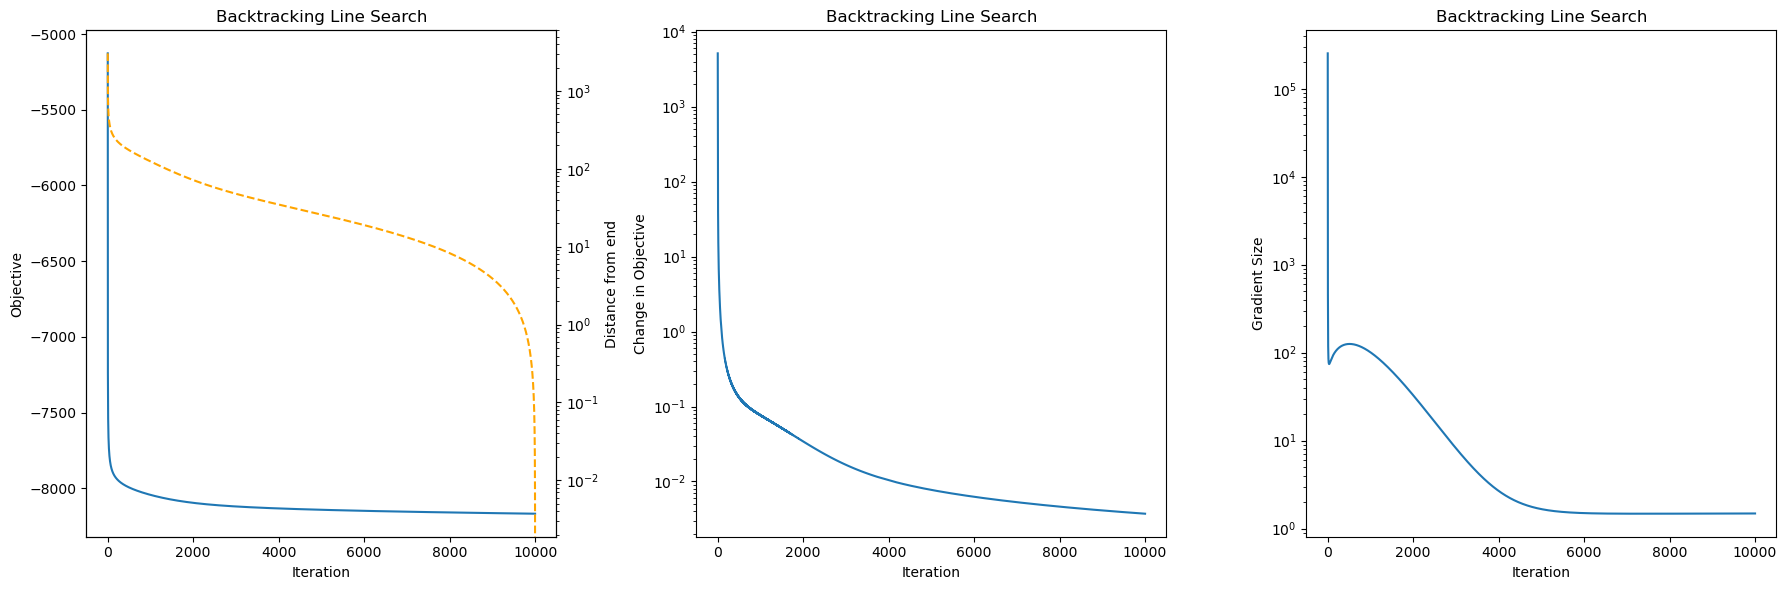

In [243]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum() - 2*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()

def grad_L1(L1, L2, X):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (2  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term + np.diag(log_term)

def grad_L2(L1, L2, X):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (2 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term + np.diag(log_term)


def backtracking_line_search(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100, min_diag=1e-6):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = np.zeros_like(L2_init)
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    changes = []
    for i in range(max_iter):
        gradL1 = grad_L1(L1, L2, X)

        iter_step_size = step_size

        line_search_succeeded = True
        for j in range(max_backtrack):
            L1 -= iter_step_size * gradL1

                

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L1 += iter_step_size * gradL1
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            objective_val = prev_objective
            line_search_succeeded = False
            #break
        iters.append(objective_val)
        eps.append(delta)
        grads.append((gradL1**2).sum())
        prev_objective = objective_val

        #if abs(delta) < tol:
        if abs(delta) < tol or not line_search_succeeded:
            # Converged!
            break
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads), changes

#Y = np.arange(144).reshape(12, 12) + np.eye(12)
#Y /= np.linalg.norm(Y, ord=2)
Y = np.random.normal(size=(40, 40))
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads, changes = backtracking_line_search(
    Y, step_size=1, tol=1e-15, beta=0.5, max_iter=10000, max_backtrack=50,
)
#print(L1)
#print(L2)
#print(iters)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.set_title('Backtracking Line Search')
ax1.plot(iters)
ax1_twin = ax1.twinx()
ax1_twin.set_ylabel('Distance from end')
ax1_twin.set_yscale('log')
ax1_twin.plot(np.arange(len(iters)), iters - iters[-1], linestyle='--', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change in Objective')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])

for ax in (ax1, ax2, ax3):
    for change in changes:
        ax.axvline(change, color='red', linestyle='--', alpha=0.5)

fig.tight_layout()
print(iters[-1])

Iteration 0: delta = -3.818697350866972, objective = 7.345353113895649
Iteration 1000: delta = -1.263098889196451e-07, objective = 1.885402074079332e-05
Iteration 2000: delta = -1.8822393212647573e-10, objective = 1.84224250637059e-06
Iteration 3000: delta = -9.902625757782775e-10, objective = 4.855702409315565e-07
Iteration 4000: delta = -3.3271503542467036e-10, objective = 2.581601453852401e-07
Iteration 5000: delta = -1.3036354371784226e-11, objective = 1.6540007262274395e-07
Iteration 6000: delta = -1.0804097466096294e-10, objective = 1.1031766332690655e-07
Iteration 7000: delta = -1.1905402452524337e-11, objective = 7.453444682058655e-08
Iteration 8000: delta = -3.7499869656031795e-12, objective = 5.0625527650629046e-08
Iteration 9000: delta = -3.1194722396632687e-11, objective = 3.448541619476085e-08
Iteration 10000: delta = -4.117252554436027e-12, objective = 2.3604588240646186e-08
Iteration 11000: delta = -1.6104440153893132e-12, objective = 1.624492955536117e-08
Iteration 1200

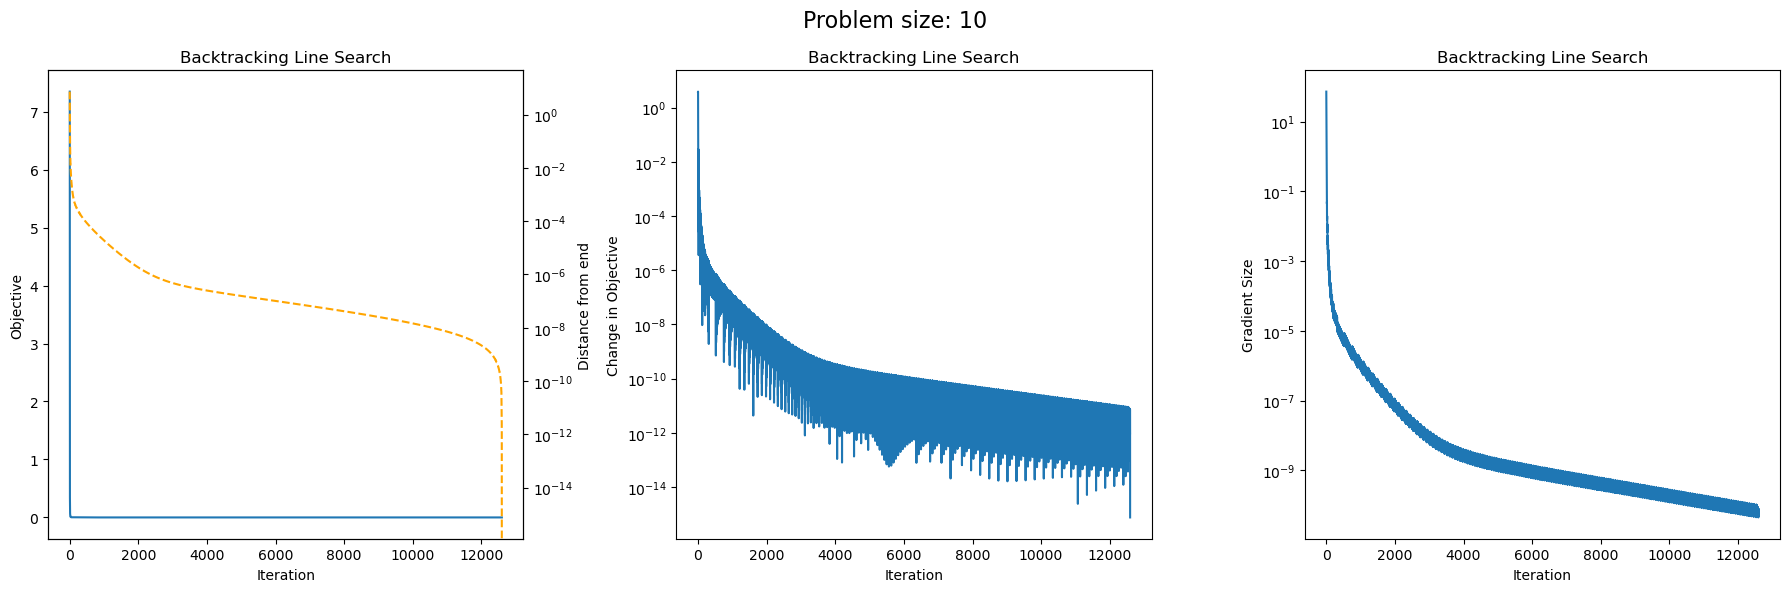

In [264]:
def objective(L1, L2, X):
    return ((L1 @ X + X @ L2.T)**2).sum()# - 2*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()

def grad_L1(L1, L2, X):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (2  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term# + 2*np.diag(log_term)

def grad_L2(L1, L2, X):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (2 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term# + 2*np.diag(log_term)


def backtracking_line_search(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100, min_diag=1e-6):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    for i in range(max_iter):
        gradL1 = grad_L1(L1, L2, X)
        gradL2 = grad_L2(L1, L2, X)

        # Project gradient onto identifiable representation
        alpha = (np.trace(gradL1) + np.trace(gradL2)) / (gradL1.shape[0] + gradL2.shape[0])
        gradL1 -= alpha * np.eye(gradL1.shape[0])
        gradL2 += alpha * np.eye(gradL2.shape[0])

        iter_step_size = step_size

        line_search_succeeded = True
        for j in range(max_backtrack):
            L1 -= iter_step_size * gradL1
            L2 -= iter_step_size * gradL2

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L1 += iter_step_size * gradL1
                L2 += iter_step_size * gradL2
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            objective_val = prev_objective
            line_search_succeeded = False
        iters.append(objective_val)
        eps.append(delta)
        grads.append((gradL1**2).sum()+(gradL2**2).sum())
        prev_objective = objective_val

        if abs(delta) < tol or not line_search_succeeded:
            # Converged!
            break
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads)

problem_size = 10
Y = np.random.normal(size=(problem_size, problem_size))
Y /= np.linalg.norm(Y, ord=2)
L1, L2, iters, eps, grads = backtracking_line_search(
    Y, step_size=1, tol=1e-15, beta=0.8, max_iter=1000000, max_backtrack=50,
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.set_title('Backtracking Line Search')
ax1.plot(iters)
ax1_twin = ax1.twinx()
ax1_twin.set_ylabel('Distance from end')
ax1_twin.set_yscale('log')
ax1_twin.plot(np.arange(len(iters)), iters - iters[-1], linestyle='--', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change in Objective')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.suptitle(f"Problem size: {problem_size}", fontsize=16)

fig.tight_layout()
print(iters[-1])

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3147539261.py:2: RuntimeWarning: invalid value encountered in log
  return ((L1 @ X + X @ L2.T)**2).sum() - 2*np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1)).sum()


Iteration 0: delta = -57962.29229546763, objective = 423110.18609185575
Iteration 1000: delta = -0.04721030308627405, objective = -507.20498616987135
Iteration 2000: delta = -0.002036110651488343, objective = -529.1372572403658
Iteration 3000: delta = -0.011597447172675857, objective = -539.9634423347374
Iteration 4000: delta = -0.007572125474666791, objective = -547.4780303930117
Iteration 5000: delta = -0.006204072183209064, objective = -553.1068180866835
Iteration 6000: delta = -0.0050682314296182085, objective = -557.4656664110724
Iteration 7000: delta = -0.0037853026702805437, objective = -560.9114625120769
Iteration 8000: delta = -0.003245539107638251, objective = -563.6760421235522
Iteration 9000: delta = -0.002421842405397001, objective = -565.9271069654947
Iteration 10000: delta = -0.0021242015119469215, objective = -567.7795621124372
Iteration 11000: delta = -0.0019472546873657848, objective = -569.3211877056802
Iteration 12000: delta = -0.0015285221363683377, objective = -57

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/3147539261.py:52: UserWarning: Backtracking line search failed to find a suitable step size.
  warnings.warn("Backtracking line search failed to find a suitable step size.")


-580.8281055227604


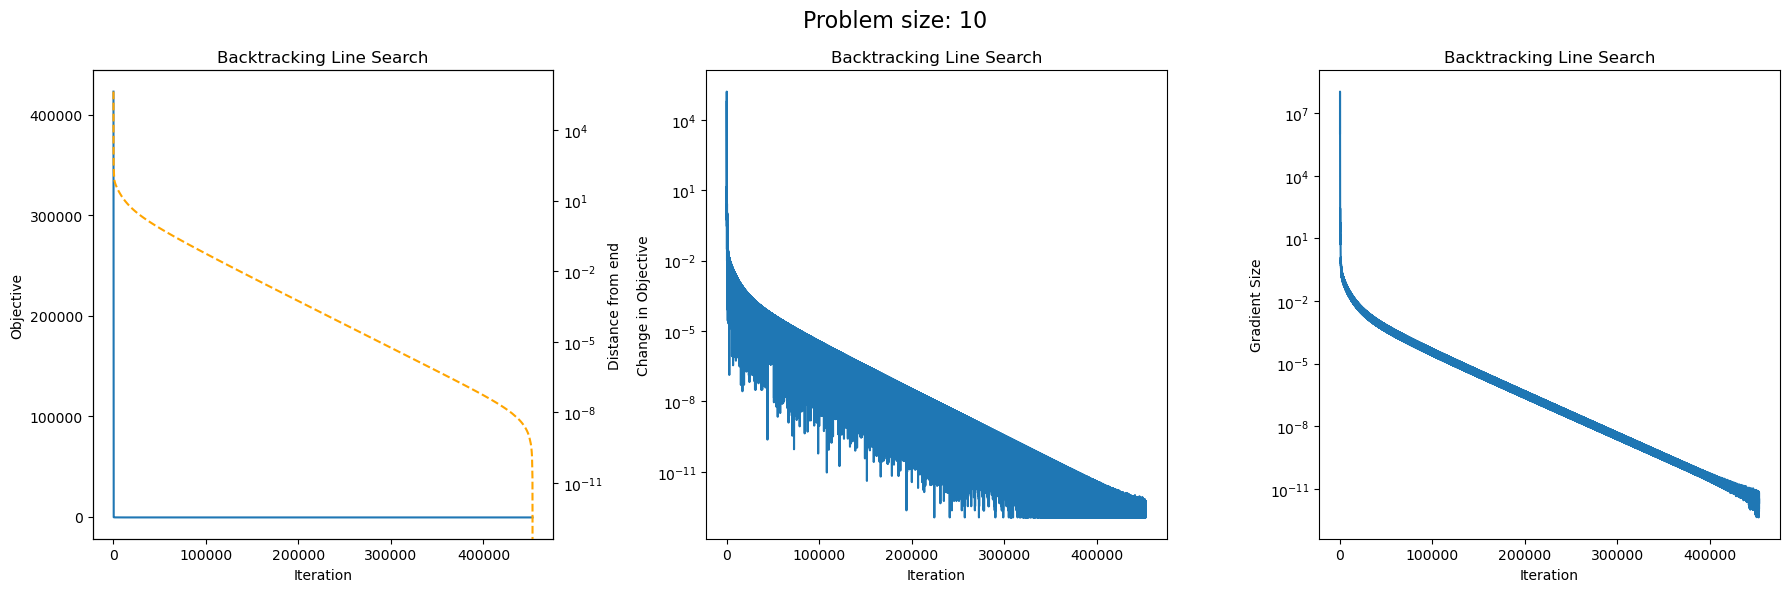

In [258]:
L1, L2, iters, eps, grads = backtracking_line_search(
    Y, step_size=1, tol=1e-15, beta=0.8, max_iter=1000000, max_backtrack=50,
    L1_init=L2, L2_init=L1
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.set_title('Backtracking Line Search')
ax1.plot(iters)
ax1_twin = ax1.twinx()
ax1_twin.set_ylabel('Distance from end')
ax1_twin.set_yscale('log')
ax1_twin.plot(np.arange(len(iters)), iters - iters[-1], linestyle='--', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change in Objective')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.suptitle(f"Problem size: {problem_size}", fontsize=16)

fig.tight_layout()
print(iters[-1])

In [4]:
type DataMatrix = np.ndarray
type GramMatrix = np.ndarray
type GramMatrices = list[GramMatrix]
type Axis = int
type FactorMatrix = np.ndarray
type DiagonalOffset = int
type NumToKeep = int
type SparsityPercent = float
type StepSize = float

@dataclass
class KSParameterization:
    """
    (kronsum_i^K L_i) + c_i * I
    where trace(L_i) = 0
    """
    Ls: list[FactorMatrix]
    c: DiagonalOffset = field(default=0.0)
    K: int = field(init=False)
    ds: list[int] = field(init=False)

    def __post_init__(self):
        self.K = len(self.Ls)
        if self.K <= 1:
            raise ValueError("K must be greater than 1")
        
        for L in self.Ls:
            if len(L.shape) != 2:
                raise ValueError("L must be a square 2D matrix")
            if L.shape[0] != L.shape[1]:
                raise ValueError("L must be a square matrix")
            
        self.ds = [L.shape[0] for L in self.Ls]

        self.identify()

    def identify(self):
        """
        Adjust the parameterization to an identifiable form.
        """
        for L in self.Ls:
            trL = np.trace(L)
            L -= (trL / L.shape[0]) * np.eye(L.shape[0])
            self.c += trL / L.shape[0]

    def __add__(self, other: "KSParameterization") -> "KSParameterization":
        """
        Add two parameterizations.
        """
        if self.K != other.K:
            raise ValueError("K must be the same for both parameterizations")
        
        new_Ls = [self.Ls[i] + other.Ls[i] for i in range(self.K)]
        new_c = self.c + other.c
        return KSParameterization(new_Ls, new_c)

    def __mul__(self, scalar: float) -> "KSParameterization":
        """
        Scale the parameterization by a scalar.
        """
        new_Ls = [scalar * L for L in self.Ls]
        new_c = scalar * self.c
        return KSParameterization(new_Ls, new_c)
    
    def __rmul__(self, scalar: float) -> "KSParameterization":
        """
        Reverse multiplication with a scalar.
        """
        return self * scalar
    
    def __sub__(self, other: "KSParameterization") -> "KSParameterization":
        return self + (-1 * other)
    
    def actualize(self) -> np.ndarray:
        """
        Compute Kronecker sum of factor matrices.
        """
        D = np.prod(self.ds)
        out = np.zeros((D, D))
        for i in range(self.K):
            D_less = int(np.prod(self.ds[:i]))
            D_more = int(np.prod(self.ds[i + 1:]))
            L = self.Ls[i]
            out += np.kron(np.eye(D_less), np.kron(L, np.eye(D_more)))
        out += self.c * np.eye(D)
        return out

def generate_KSParameterization(
    ds: list[int],
    sp: SparsityPercent
) -> DataMatrix:
    # Generate random triangular matrices with strictly positive diagonals
    Ls = [np.random.normal(size=(d, d)) for d in ds]
    for i, L in enumerate(Ls):
        # Make the matrix triangular
        L = np.tril(L)

        # Make the diagonal positive
        L_diag = np.diag(np.diag(L))
        np.fill_diagonal(L, 0)
        L += np.abs(L_diag)

        # Make the diagonal strictly positive
        L += np.eye(L.shape[0]) * 1e-6

        # Remove ~sp% of the off-diagonal elements randomly
        # Do this by creating a Bernoulli mask
        mask = np.random.rand(*L.shape) > sp

        # Ensure diagonal is not masked
        np.fill_diagonal(mask, 0)
        L[mask] = 0
        Ls[i] = L

    # Create the KSParameterization
    L = KSParameterization(Ls)
    return L
def generate_data(L: KSParameterization) -> DataMatrix:
    """
    Generates data from the Cartesian LGAM model.

    Amusingly, even though this is a "generative model", a naive
    approach is **very** computationally expensive.

    We need to solve L^-1 * e where e is i.i.d. standard normal
    and L is a Kronecker sum of matrices.

    This could be done in O(d^[3K]) time... i.e. sextic for K=2!!!

    A less-naive way is to use specialized triangular-solvers.  These
    still require the computation of L and the solve, which is O(d^(2K)) time,
    i.e. quartic for K=2.  That's what is implemented here.

    A more advanced method can be achieved with the Bartels–Stewart algorithm
    in the K=2 case, which is implemented in scipy as `scipy.linalg.solve_sylvester`.
    But scipy does not implement this in the K>2 case, so I have not either.
    In the K=2 case, though, runtime is cubic - which is about as good as we could
    have ever hoped for!
    """

    # Half-naive approach: actualize L and solve triangular system:
    L_actual = L.actualize()

    # Generate i.i.d. standard normal data
    e = np.random.normal(size=L_actual.shape[0])

    # Solve the triangular system
    x = linalg.solve_triangular(L_actual, e, lower=True)

    # Reshape the data to the original dimensions
    data_shape = tuple(L.ds)
    data = x.reshape(data_shape)
    return data

L_star = generate_KSParameterization((10, 10), 1)
X = generate_data(L_star)
X /= np.linalg.norm(X, ord=2)
X

array([[ 3.60178223e-07, -2.28322502e-06,  2.48877087e-06,
         6.57789317e-07, -1.41589725e-06,  9.65914029e-08,
        -1.49136085e-06, -1.66553295e-06, -1.59741629e-06,
        -2.78150235e-06],
       [ 8.66437656e-08,  9.86589726e-07,  1.76403569e-06,
         4.51659005e-07, -3.24882168e-06, -1.12262414e-06,
         2.02555900e-06,  1.07664416e-06,  3.09722423e-08,
        -2.22467318e-06],
       [-9.71729931e-07, -6.14164244e-07, -1.44665635e-05,
        -9.39193735e-06,  2.03225282e-05,  1.91656143e-05,
         7.69733432e-06, -2.42454417e-05,  4.86571923e-06,
        -5.33206697e-05],
       [ 4.43017493e-07,  6.16834412e-07, -6.80947475e-05,
        -6.88981719e-05,  2.74998112e-04,  5.45447270e-04,
        -3.76839111e-05, -4.94774014e-03,  4.71252129e-04,
        -2.58580533e-02],
       [-9.78054179e-07, -1.17731919e-06,  1.97222292e-05,
         2.00009533e-05, -7.99363754e-05, -1.64360553e-04,
         1.04381113e-05,  1.44054301e-03, -1.28741453e-04,
         7.

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/1061189584.py:2: RuntimeWarning: invalid value encountered in log
  log_term = np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))


Iteration 0: delta = -0.07937076951111788, objective = 3.9207227313138464
Iteration 1000: delta = -1.9647813456936817e-07, objective = 0.00033557177909949933
Iteration 2000: delta = -6.851420523070893e-08, objective = 0.00023122955761019145
Iteration 3000: delta = -4.372562082544237e-08, objective = 0.00017770738647836424
Iteration 4000: delta = -3.180098480016114e-08, objective = 0.00014091086669567996
Iteration 5000: delta = -2.4041922964786124e-08, objective = 0.00011353448755737997
Iteration 6000: delta = -1.879866319255902e-08, objective = 9.264985116658684e-05
Iteration 7000: delta = -1.458612138545228e-08, objective = 7.646901162192817e-05
Iteration 8000: delta = -1.1427911357291768e-08, objective = 6.38187813156961e-05
Iteration 9000: delta = -9.038303879815629e-09, objective = 5.3834647729936046e-05
Iteration 10000: delta = -7.216344495942562e-09, objective = 4.58808161183364e-05
Iteration 11000: delta = -5.816998166850295e-09, objective = 3.9484700586999394e-05
Iteration 1200

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/1061189584.py:104: UserWarning: Maximum number of iterations reached.
  warnings.warn("Maximum number of iterations reached.")


2.7867686485073096e-06


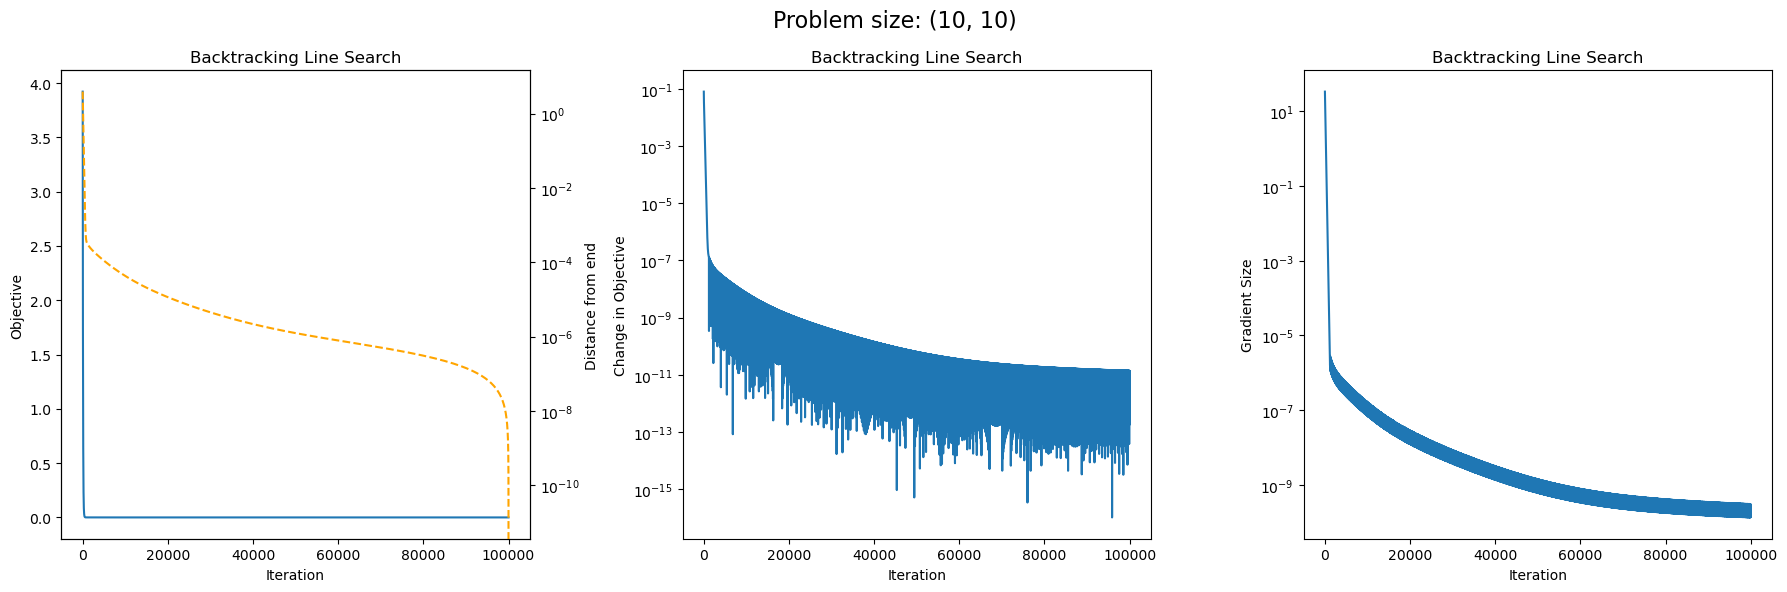

In [ ]:
def objective(L1, L2, X):
    log_term = np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))
    return ((L1 @ X + X @ L2.T)**2).sum()# - 2*log_term.sum()

def grad_L1(L1, L2, X):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (2  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term# + 2*np.diag(log_term)

def grad_L2(L1, L2, X):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (2 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term# + 2*np.diag(log_term)

def hard_threshold_factor(
    L: FactorMatrix,
    s: NumToKeep
) -> FactorMatrix:
    """
    Hard thresholding of a factor matrix.
    Keep only the s largest off-diagonal elements by absolute value.
    """
    # Get the absolute values of the off-diagonal elements
    L_flat = np.abs(L[np.tril_indices(L.shape[0], -1)])
    
    # Sort the values
    sorted_indices = np.argsort(L_flat)[::-1]
    sorted_values = L_flat[sorted_indices]

    # Get the threshold value
    if s > 0:
        threshold = sorted_values[s - 1] if s < len(sorted_values) else 0
    else:
        threshold = np.inf

    # Remove all elements of L that are below the threshold
    new_L = L.copy()
    new_L[np.abs(new_L) < threshold] = 0
    
    # Ensure the diagonals got carried over correctly
    np.fill_diagonal(new_L, 0)
    new_L += np.diag(np.diag(L))
    
    return new_L


def backtracking_line_search(X, L1_init=None, L2_init=None, step_size=1, max_iter=100, tol=1e-6, beta=0.8, max_backtrack=100, min_diag=1e-6):
    if L1_init is None:
        L1_init = np.eye(X.shape[0])
    if L2_init is None:
        L2_init = np.eye(X.shape[1])
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    prev_objective = objective(L1, L2, X)
    iters = []
    eps = []
    grads = []
    for i in range(max_iter):
        gradL1 = grad_L1(L1, L2, X)
        gradL2 = grad_L2(L1, L2, X)

        # Project gradient onto identifiable representation
        alpha = (np.trace(gradL1) + np.trace(gradL2)) / (gradL1.shape[0] + gradL2.shape[0])
        gradL1 -= alpha * np.eye(gradL1.shape[0])
        gradL2 += alpha * np.eye(gradL2.shape[0])

        iter_step_size = step_size

        line_search_succeeded = True
        oldL1 = L1
        oldL2 = L2
        for j in range(max_backtrack):
            L1 = oldL1 - iter_step_size * gradL1
            L2 = oldL2 - iter_step_size * gradL2
            #L1 = hard_threshold_factor(L1, s=10)
            #L2 = hard_threshold_factor(L2, s=10)

            objective_val = objective(L1, L2, X)
            delta = objective_val - prev_objective

            if delta < 0:
                break
            else:
                L1 = oldL1
                L2 = oldL2
                iter_step_size *= beta
        else:
            warnings.warn("Backtracking line search failed to find a suitable step size.")
            objective_val = prev_objective
            line_search_succeeded = False
            L1 = oldL1
            L2 = oldL2
        iters.append(objective_val)
        eps.append(delta)
        grads.append((gradL1**2).sum()+(gradL2**2).sum())
        prev_objective = objective_val

        if abs(delta) < tol or not line_search_succeeded:
            # Converged!
            break
        if i % 1000 == 0:
            print(f"Iteration {i}: delta = {delta}, objective = {objective_val}")
    else:
        warnings.warn("Maximum number of iterations reached.")
    return L1, L2, np.array(iters), np.array(eps), np.array(grads)

problem_size = X.shape
L1, L2, iters, eps, grads = backtracking_line_search(
    X, step_size=1, tol=1e-20, beta=0.8, max_iter=100000, max_backtrack=50,
    #L1_init=L_star.Ls[0] + (L_star.c / X.shape[0]) * np.eye(X.shape[0]), L2_init=L_star.Ls[1] + (L_star.c / X.shape[1]) * np.eye(X.shape[1])
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective')
ax1.set_title('Backtracking Line Search')
ax1.plot(iters)
ax1_twin = ax1.twinx()
ax1_twin.set_ylabel('Distance from end')
ax1_twin.set_yscale('log')
ax1_twin.plot(np.arange(len(iters)), iters - iters[-1], linestyle='--', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Change in Objective')
ax2.set_title('Backtracking Line Search')
ax2.set_yscale('log')
ax2.plot(np.arange(len(eps)), [abs(x) for x in eps])
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Gradient Size')
ax3.set_title('Backtracking Line Search')
ax3.set_yscale('log')
ax3.plot(np.arange(len(grads)), [abs(x) for x in grads])
fig.suptitle(f"Problem size: {problem_size}", fontsize=16)

fig.tight_layout()
print(iters[-1])

/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_66044/4211073898.py:63: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.array(losses) - min(losses)))


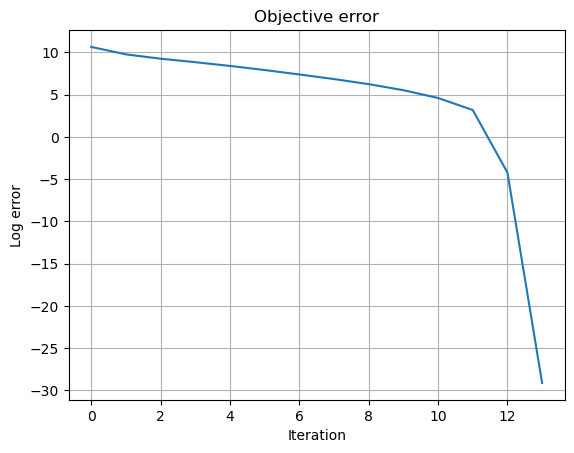

In [347]:
import numpy as np
import matplotlib.pyplot as plt

def f(L, S):
    return np.trace(L @ L.T @ S) - 2 * np.log(np.diag(L)).sum()

def grad_f(L, S):
    return 2 * L @ S - 2 / (np.diag(L))

def project_to_lower_with_positive_diag(M):
    """Project M to strictly lower-triangular + positive diagonal"""
    L = np.tril(M)
    np.fill_diagonal(L, np.maximum(np.diag(L), 1e-3))  # Ensure positive diag
    return L

def gradient_descent(S, L0, max_iters=200, beta=0.5, c=1e-4):
    L = L0.copy()
    losses = []

    eigvals = np.linalg.eigvalsh(S)
    lambda_min, lambda_max = eigvals[0], eigvals[-1]
    
    for _ in range(max_iters):
        f_curr = f(L, S)
        g = grad_f(L, S)

        # Estimate local strong convexity and smoothness constants
        diag_L = np.diag(L)
        inv_diag_sq = 1.0 / diag_L**2
        
        m = 2 * lambda_min + 2 * np.min(inv_diag_sq)
        L_smooth = 2 * lambda_max + 2 * np.max(inv_diag_sq)
        
        # Initial step size suggestion
        eta = 1.0 / L_smooth
        
        # Backtracking line search
        t = eta
        while True:
            L_new = L - t * g
            L_new = project_to_lower_with_positive_diag(L_new)
            f_new = f(L_new, S)
            if f_new <= f_curr - c * t * np.linalg.norm(g, 'fro')**2:
                break
            t *= beta  # Shrink step size

        L = L_new
        losses.append(f_new)

    return L, losses

np.random.seed(0)
n = 50
A = np.random.randn(n, n)
S = A @ A.T + n * np.eye(n)  # Ensure S ≻ 0

L0 = np.tril(np.random.randn(n, n))
np.fill_diagonal(L0, np.abs(np.diag(L0)) + 1.0)

L_opt, losses = gradient_descent(S, L0)

# Plot convergence
plt.plot(np.log(np.array(losses) - min(losses)))
plt.title("Objective error")
plt.xlabel("Iteration")
plt.ylabel("Log error")
plt.grid(True)
plt.show()


/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_69121/3048313178.py:94: RuntimeWarning: divide by zero encountered in log
  ax1.plot(np.log(np.array(losses) - min(losses)))


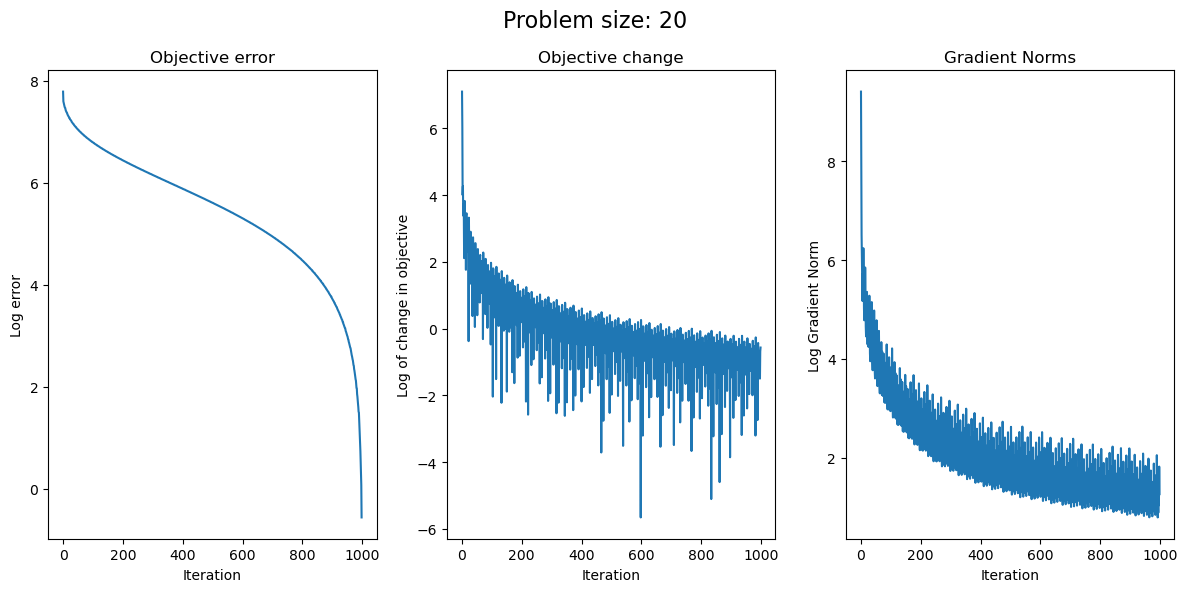

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def objective(L1, L2, X):
    log_term = np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))
    return ((L1 @ X + X @ L2.T)**2).sum() - 2*log_term.sum()

def grad_L1(L1, L2, X):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (2  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term + 2*np.diag(log_term)

def grad_L2(L1, L2, X):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (2 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term + 2*np.diag(log_term)


def project_to_lower_with_positive_diag(M):
    """Project M to strictly lower-triangular + positive diagonal"""
    L = np.tril(M)
    np.fill_diagonal(L, np.maximum(np.diag(L), 1e-3))  # Ensure positive diag
    return L

def project_to_identifiable_rep(L1, L2):
    n, m = L1.shape[0], L2.shape[0]
    tr_L1, tr_L2 = np.trace(L1), np.trace(L2)

    # Average trace per unit
    c1 = tr_L1 / n
    c2 = tr_L2 / m
    c = (c1 + c2) / 2  # average to keep symmetry

    M1 = L1 - c * np.eye(n)
    M2 = L2 - c * np.eye(m)

    return M1 + c*np.eye(n), M2


def gradient_descent(X, L1_init, L2_init, max_iters=1000, beta=0.5, c=1e-4, tol=1e-20):
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    losses = []
    grads = []
    eps = []
    
    for _ in range(max_iters):
        f_curr = objective(L1, L2, X)
        gL1 = grad_L1(L1, L2, X)
        gL2 = grad_L2(L1, L2, X)
        gL1, gL2 = project_to_identifiable_rep(gL1, gL2)
        
        # Backtracking line search
        t = 1
        fro_norm = np.linalg.norm(gL1, 'fro')**2 + np.linalg.norm(gL2, 'fro')**2
        while True:
            L1_new = L1 - t * gL1
            L2_new = L2 - t * gL2
            L1_new = project_to_lower_with_positive_diag(L1_new)
            L2_new = project_to_lower_with_positive_diag(L2_new)
            f_new = objective(L1_new, L2_new, X)
            if f_new <= f_curr - c * t * fro_norm:
                break
            t *= beta  # Shrink step size

        L1 = L1_new
        L2 = L2_new
        losses.append(f_new)
        eps.append(f_new - f_curr)
        grads.append(fro_norm)

        if abs(eps[-1]) <= tol:
            break

    return L1, L2, losses, grads, eps

np.random.seed(0)
n = 20
#A = np.random.randn(n, n)
L_star = generate_KSParameterization((n, n), 1)
A = generate_data(L_star)
A /= np.linalg.norm(A, ord=2)

L1_init = np.tril(np.random.randn(n, n))
np.fill_diagonal(L1_init, np.abs(np.diag(L1_init)) + 1.0)
L2_init = np.tril(np.random.randn(n, n))
np.fill_diagonal(L2_init, np.abs(np.diag(L2_init)) + 1.0)


L1_opt, L2_opt, losses, grads, eps = gradient_descent(A, L1_init, L2_init)

# Plot convergence
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 6))
ax1.plot(np.log(np.array(losses) - min(losses)))
ax1.set_title("Objective error")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Log error")
ax2.plot(np.log(-np.array(eps)))
ax2.set_title("Objective change")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Log of change in objective")
ax3.plot(np.log(np.array(grads)))
ax3.set_title("Gradient Norms")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Log Gradient Norm")
fig.suptitle(f"Problem size: {n}", fontsize=16)
fig.tight_layout()


In [27]:
s = 6
test = np.tril(np.arange(1,s**2+1).reshape(s, s), k=-1)
test_full = (np.kron(test, np.eye(s)) + np.kron(np.eye(s), test)).reshape(1, -1)
#print(test_full)

P = np.zeros(((test_full > 0).sum(), test_full.shape[1]))
for idx, val in enumerate(np.where(test_full.reshape(-1) != 0)[0]):
    P[idx, val] = 1
print(P.shape)
#print(P @ test_full.reshape(-1))

#P = np.random.random(size=P.shape)
#print(np.linalg.matrix_rank(P))

L_star = generate_KSParameterization((s, s), 1)
X = generate_data(L_star)
S = np.kron(X.reshape(-1, 1) * X.reshape(1, -1), np.eye(s**2))
print(np.linalg.matrix_rank(S))
#print(S)
print(S.shape)
print(np.linalg.matrix_rank(P @ np.kron(X.reshape(-1, 1), np.eye(s**2)), hermitian=False))
Q = P @ S @ P.T
print(np.linalg.eigh(Q).eigenvalues.min())
print(np.linalg.matrix_rank(Q))
print(Q.shape)

(180, 1296)
36
(1296, 1296)
35
-2.864367472642465e-13
35
(180, 180)


In [542]:
print(0 + ((P @ S @ P.T) != 0))

[[1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_69121/1523261806.py:110: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(np.log10(np.array(losses) - min(losses)))
/var/folders/k0/qy74mdx10qs493700g929k5h0000gn/T/ipykernel_69121/1523261806.py:114: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(-np.array(eps)))


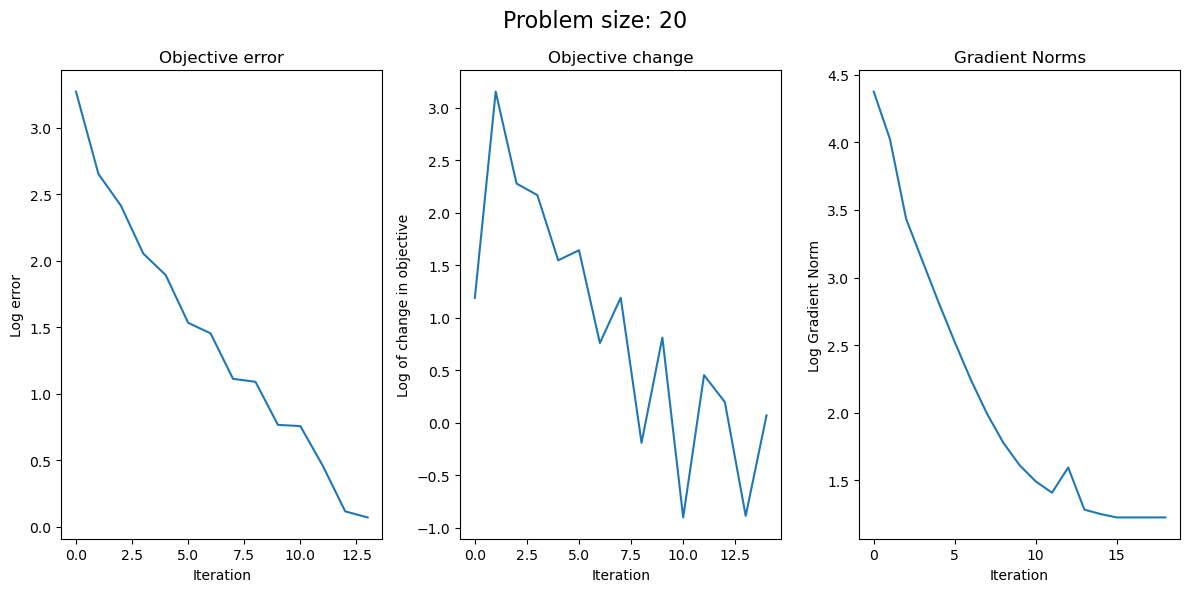

In [99]:
def objective(L1, L2, X, frobreg, glassoreg):
    log_term = np.log(np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))
    frob_term = (L1**2).sum() + (L2**2).sum()
    glasso_term = np.abs(np.tril(L1, k=-1)).sum()
    return ((L1 @ X + X @ L2.T)**2).sum() - 2*log_term.sum() + frobreg * frob_term + glassoreg * glasso_term

def grad_L1(L1, L2, X, frobreg):
    trace_term = np.tril(2 * (L1 @ X @ X.T + X @ L2.T @ X.T), k=0)
    log_term = - (2  / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=1)
    return trace_term + 2*np.diag(log_term) + 2*frobreg*L1

def grad_L2(L1, L2, X, frobreg):
    trace_term = np.tril(2 * (L2 @ X.T @ X + X.T @ L1.T @ X), k=0)
    log_term = - (2 / (np.diag(L1).reshape(-1, 1) + np.diag(L2).reshape(1, -1))).sum(axis=0)
    return trace_term + 2*np.diag(log_term) + 2*frobreg*L2


def project_to_lower_with_positive_diag(M):
    """Project M to strictly lower-triangular + positive diagonal"""
    L = np.tril(M)
    np.fill_diagonal(L, np.maximum(np.diag(L), 1e-3))  # Ensure positive diag
    return L

def soft_thresholding(
    L: FactorMatrix,
    reg: NumToKeep
) -> FactorMatrix:
    diags = np.diag(L)
    L_out = np.sign(L) * np.maximum(np.abs(L) - reg, 0)
    np.fill_diagonal(L_out, diags)
    return L_out


def project_to_identifiable_rep(L1, L2):
    n, m = L1.shape[0], L2.shape[0]
    tr_L1, tr_L2 = np.trace(L1), np.trace(L2)

    # Average trace per unit
    c1 = tr_L1 / n
    c2 = tr_L2 / m
    c = (c1 + c2) / 2  # average to keep symmetry

    M1 = L1 - c * np.eye(n)
    M2 = L2 - c * np.eye(m)

    return M1 + c*np.eye(n), M2


def gradient_descent(X, L1_init, L2_init, max_iters=1000, beta=0.5, c=1e-4, tol=1e-20, frobreg=0, glassoreg=0):
    L1 = L1_init.copy()
    L2 = L2_init.copy()
    losses = []
    grads = []
    eps = []

    time_below_tol = 0
    
    for _ in range(max_iters):
        f_curr = objective(L1, L2, X, frobreg, glassoreg)
        gL1 = grad_L1(L1, L2, X, frobreg)
        gL2 = grad_L2(L1, L2, X, frobreg)
        #gL1, gL2 = project_to_identifiable_rep(gL1, gL2)
        
        # Backtracking line search
        # Note: does not work if glassoreg != 0
        t = 1
        fro_norm = np.linalg.norm(gL1, 'fro')**2 + np.linalg.norm(gL2, 'fro')**2
        while True:
            L1_new = soft_thresholding(L1 - t * gL1, glassoreg)
            L2_new = soft_thresholding(L2 - t * gL2, glassoreg)
            L1_new = project_to_lower_with_positive_diag(L1_new)
            L2_new = project_to_lower_with_positive_diag(L2_new)
            f_new = objective(L1_new, L2_new, X, frobreg, glassoreg)
            if f_new <= f_curr - c * t * fro_norm:
                break
            t *= beta  # Shrink step size

        L1 = L1_new
        L2 = L2_new
        losses.append(f_new)
        eps.append(f_new - f_curr)
        grads.append(fro_norm)

        if abs(eps[-1]) <= tol:
            if time_below_tol == 3:
                break
            time_below_tol += 1
        else:
            time_below_tol = 0

    return L1, L2, losses, grads, eps

n = 20
#A = np.random.randn(n, n)
np.random.seed(0)
L_star = generate_KSParameterization((n, n), 1)
A = generate_data(L_star)
A /= np.linalg.norm(A, ord=2)

L1_init = np.tril(np.random.randn(n, n))
np.fill_diagonal(L1_init, np.abs(np.diag(L1_init)) + 1.0)
L2_init = np.tril(np.random.randn(n, n))
np.fill_diagonal(L2_init, np.abs(np.diag(L2_init)) + 1.0)


L1_opt, L2_opt, losses, grads, eps = gradient_descent(A, L1_init, L2_init, frobreg=0.01, tol=1e-50, glassoreg=0)

# Plot convergence
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 6))
ax1.plot(np.log10(np.array(losses) - min(losses)))
ax1.set_title("Objective error")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Log error")
ax2.plot(np.log10(-np.array(eps)))
ax2.set_title("Objective change")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Log of change in objective")
ax3.plot(np.log10(np.array(grads)))
ax3.set_title("Gradient Norms")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Log Gradient Norm")
fig.suptitle(f"Problem size: {n}", fontsize=16)
fig.tight_layout()
